## 全体の流れ
<ol>
<li>データを読み込んで確認する</li>
<li>株価データの全体像をつかむ</li>
<li>株価分析の精度を上げる特徴量を追加する</li>
<li>分析のためにデータを整える</li>
<li>株価予測モデルの生成</li>
<li>CSVファイルで出力</li>
</ol>

##ニューラルネット
メリット：特徴量を自動で生成してくれるため、画像認識や音声処理など特徴量を人工的に作れない複雑なデータの予測に向いている。

デメリット：ハイパーパラメータの調整がとにかく難しい。予測値を出力する過程が説明できない(ブラックボックス化)。数式も複雑なため、他の機械学習をマスターした後に学ぶほうが無難。

## データを読み込んで確認する

In [1]:
# pandasのインポート
import pandas as pd
# numpyのインポート
import numpy as np
# matplotlibのインポート
from matplotlib import pyplot as plt

In [2]:
# データの読み込み
df_train = pd.read_csv('train_finance2.csv')
df_test = pd.read_csv('test_finance2.csv')
df_sample = pd.read_csv('submit_finance.csv')

In [3]:
# データフレームの先頭20行の表示
df_train.head(20)

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332258,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
5,2003-12-08,113.220483,112.425105,112.553700,113.035089
6,2003-12-09,113.562415,112.831025,113.044748,113.312017
7,2003-12-10,113.460736,112.498941,113.303692,112.766375
8,2003-12-11,113.173376,112.137524,112.766375,113.072392
9,2003-12-12,113.830742,112.970206,113.100037,113.580543


In [4]:
df_train.tail()

,Date,High,Low,Open,Close
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361
2073,2011-12-14,120.796608,119.824855,120.508620,120.427021


In [5]:
# データの行数とカラム数を調べる
df_train.shape

(2074, 5)

In [6]:
#"Up"の追加
df_train["Shift"]=df_train["Open"].shift(-1)
df_train["Diff"]=df_train["Shift"]-df_train["Close"]
df_train["Up"]=df_train["Diff"].apply(lambda x:1 if x>=0 else 0)
df_train=df_train.dropna()
df_train=df_train[["Date","High","Low","Open","Close","Up"]]
df_train.head(10)

,Date,High,Low,Open,Close,Up
0,2003-12-01,111.370639,110.482062,111.314347,110.676377,0
1,2003-12-02,112.008532,110.500532,110.639316,111.823016,1
2,2003-12-03,112.202814,111.712284,111.832477,112.137524,0
3,2003-12-04,112.332258,111.406851,112.110343,111.748717,0
4,2003-12-05,112.766375,111.609834,111.721723,112.729259,0
5,2003-12-08,113.220483,112.425105,112.553700,113.035089,1
6,2003-12-09,113.562415,112.831025,113.044748,113.312017,0
7,2003-12-10,113.460736,112.498941,113.303692,112.766375,1
8,2003-12-11,113.173376,112.137524,112.766375,113.072392,1
9,2003-12-12,113.830742,112.970206,113.100037,113.580543,0


In [7]:
# 各カラムの詳細確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2073 non-null   object 
 1   High    2073 non-null   float64
 2   Low     2073 non-null   float64
 3   Open    2073 non-null   float64
 4   Close   2073 non-null   float64
 5   Up      2073 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [8]:
# Dateのデータ型へ変更
df_train['Date'] = pd.to_datetime(df_train['Date'])
# データの並び替え
df_train.sort_values(by='Date', ascending=True, inplace=True)
# 日付をインデックスにセット
df_train.set_index(keys='Date', inplace=True)

## 株価データの全体像をつかむ

In [9]:
# 基本統計量の確認
df_train.describe()

,High,Low,Open,Close,Up
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,124.079821,122.978305,123.527660,123.530986,0.569706
std,9.212134,9.157571,9.189981,9.186933,0.495237
min,108.520946,107.748581,107.993884,107.998923,0.000000
25%,117.002707,115.874130,116.401986,116.421029,0.000000
50%,123.246236,121.957648,122.599367,122.575009,1.000000
75%,130.819703,129.435799,130.202828,130.184512,1.000000
max,148.260942,146.834717,147.832063,147.888796,1.000000


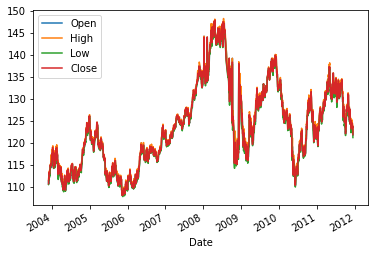

In [10]:
# グラフ化したいので、特定のカラムの抽出
df_new = df_train.loc[:, ['Open', 'High', 'Low', 'Close']]
# 折れ線グラフの描画
df_new.plot(kind='line')
plt.show()

## 評価用データ（test.csv）も整えてグラフで見てみる

In [11]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test.sort_values(by='Date', ascending=True, inplace=True)
df_test.set_index(keys='Date', inplace=True)

In [12]:
df_test.head(20)

,High,Low,Open,Close
Date,,,,
2011-12-15,120.703597,119.907182,120.132990,120.139231
2011-12-16,121.027367,120.314249,120.527453,120.524311
2011-12-19,120.629617,120.111145,120.582444,120.591872
2011-12-20,121.470779,120.221987,120.323633,120.322078
2011-12-21,122.046150,120.513328,121.063789,121.063789
2011-12-22,121.351259,120.467798,120.601311,120.620178
2011-12-29,119.731799,118.966469,119.563110,119.577026
2011-12-30,120.212615,119.381024,119.807785,119.843490
2012-01-02,119.916510,119.533757,119.880761,119.880761


In [13]:
df_new2 = df_test.loc[:, ['Open', 'High', 'Low', 'Close']]

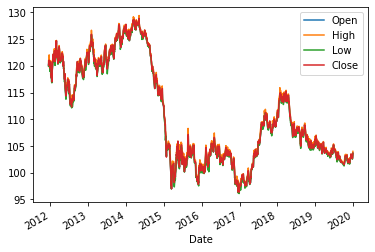

In [14]:
df_new2.plot(kind='line')
plt.show()

## 株価分析の精度を上げる特徴量を追加する

In [15]:
df_train['Body'] = df_train['Open'] - df_train['Close']
df_test['Body'] = df_test['Open'] - df_test['Close']

In [16]:
df_train.head()

,High,Low,Open,Close,Up,Body
Date,,,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377,0,0.637970
2003-12-02,112.008532,110.500532,110.639316,111.823016,1,-1.183700
2003-12-03,112.202814,111.712284,111.832477,112.137524,0,-0.305047
2003-12-04,112.332258,111.406851,112.110343,111.748717,0,0.361626
2003-12-05,112.766375,111.609834,111.721723,112.729259,0,-1.007535


In [17]:
df_test.head()

,High,Low,Open,Close,Body
Date,,,,,
2011-12-15,120.703597,119.907182,120.132990,120.139231,-0.006241
2011-12-16,121.027367,120.314249,120.527453,120.524311,0.003143
2011-12-19,120.629617,120.111145,120.582444,120.591872,-0.009428
2011-12-20,121.470779,120.221987,120.323633,120.322078,0.001555
2011-12-21,122.046150,120.513328,121.063789,121.063789,0.000000


## 説明変数（株価を上下させる原因）と目的変数（結果どうなるか）にデータを分割

In [18]:
# 説明変数をX_dataに格納
X_data = df_train.drop(columns=['Up'], inplace=False)

# 目的変数をy_dataに格納
y_data = df_train['Up']

# X_dataとy_dataの先頭5行を確認
print(X_data.head())
print(y_data.head())

                  High         Low        Open       Close      Body
Date                                                                
2003-12-01  111.370639  110.482062  111.314347  110.676377  0.637970
2003-12-02  112.008532  110.500532  110.639316  111.823016 -1.183700
2003-12-03  112.202814  111.712284  111.832477  112.137524 -0.305047
2003-12-04  112.332258  111.406851  112.110343  111.748717  0.361626
2003-12-05  112.766375  111.609834  111.721723  112.729259 -1.007535
Date
2003-12-01    0
2003-12-02    1
2003-12-03    0
2003-12-04    0
2003-12-05    0
Name: Up, dtype: int64


In [19]:
print(X_data.shape)
print(y_data.shape)

(2073, 5)
(2073,)


In [20]:
# 評価用（Test)データ
# 説明変数をX_testに格納
X_test = df_test
print(X_test.head())
print(X_test.shape)

                  High         Low        Open       Close      Body
Date                                                                
2011-12-15  120.703597  119.907182  120.132990  120.139231 -0.006241
2011-12-16  121.027367  120.314249  120.527453  120.524311  0.003143
2011-12-19  120.629617  120.111145  120.582444  120.591872 -0.009428
2011-12-20  121.470779  120.221987  120.323633  120.322078  0.001555
2011-12-21  122.046150  120.513328  121.063789  121.063789  0.000000
(1246, 5)


## 学習データ（train）と検証データ(val)にデータを分割

In [21]:
# train_test_splitのインポート
from sklearn.model_selection import train_test_split
# 学習データと検証データに75:25の割合で2分割する
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.25, shuffle=False)

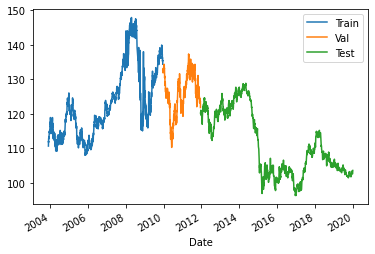

In [22]:
# 学習データのCloseの描画
X_train['Close'].plot(kind='line')
# 検証データのCloseの描画
X_val['Close'].plot(kind='line')
# 評価データのCloseの描画
X_test['Close'].plot(kind='line')
# 折れ線グラフの凡例を表示
plt.legend(['Train', 'Val', 'Test'])
# 描画の実行
plt.show()

## 6日分ごとにデータを抽出する

In [23]:
# 関数get_tの定義
def get_t(X, num_date):
    X_t_list = []
    for i in range(0, len(X) - num_date, 6):
        X_t = X.iloc[i:i+num_date, :]
        X_t_list.append(X_t)
    return X_t_list

# 期間の設定
num_date = 6
# 関数get_tの呼び出し
X_t_list = get_t(X=X_train, num_date=num_date)
# 学習データの1件目を表示
print(X_t_list[0])
# 学習データの2件目を表示
print(X_t_list[1])
# 学習データの最後から2件目を表示
print(X_t_list[-2])
# 学習データの最後から1件目を表示
print(X_t_list[-1])

                  High         Low        Open       Close      Body
Date                                                                
2003-12-01  111.370639  110.482062  111.314347  110.676377  0.637970
2003-12-02  112.008532  110.500532  110.639316  111.823016 -1.183700
2003-12-03  112.202814  111.712284  111.832477  112.137524 -0.305047
2003-12-04  112.332258  111.406851  112.110343  111.748717  0.361626
2003-12-05  112.766375  111.609834  111.721723  112.729259 -1.007535
2003-12-08  113.220483  112.425105  112.553700  113.035089 -0.481389
                  High         Low        Open       Close      Body
Date                                                                
2003-12-09  113.562415  112.831025  113.044748  113.312017 -0.267269
2003-12-10  113.460736  112.498941  113.303692  112.766375  0.537317
2003-12-11  113.173376  112.137524  112.766375  113.072392 -0.306017
2003-12-12  113.830742  112.970206  113.100037  113.580543 -0.480506
2003-12-15  114.006114  112.646899

In [24]:
len(X_t_list)

258

In [25]:
# NumPy配列にしてスピードアップ
# 関数get_tの定義
def get_t(X, num_date):
    # 入力データをNumPy配列に変換
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date, 6):
        X_t = X[i:i+num_date, :]
        X_t_list.append(X_t)
    # Numpy配列のreturn
    return np.array(X_t_list)

# 期間の設定
num_date = 6
# get_tの呼び出し
X_array_data = get_t(X=X_train, num_date=num_date)
# 学習データの1件目を表示
print(X_array_data[0])
# 学習データの2件目を表示
print(X_array_data[1])
# 学習データの最後から2件目を表示
print(X_array_data[-2])
# 学習データの最後から1件目を表示
print(X_array_data[-1])

[[111.3706392 110.4820618 111.3143471 110.6763771   0.63797  ]
 [112.008532  110.5005318 110.6393158 111.8230161  -1.1837003]
 [112.2028142 111.7122844 111.8324772 112.1375242  -0.305047 ]
 [112.3322585 111.4068514 112.110343  111.7487171   0.3616259]
 [112.7663749 111.6098338 111.7217234 112.7292585  -1.0075351]
 [113.2204831 112.4251047 112.5536999 113.0350885  -0.4813886]]
[[ 1.13562415e+02  1.12831025e+02  1.13044748e+02  1.13312017e+02
  -2.67269000e-01]
 [ 1.13460736e+02  1.12498941e+02  1.13303692e+02  1.12766375e+02
   5.37316800e-01]
 [ 1.13173376e+02  1.12137524e+02  1.12766375e+02  1.13072392e+02
  -3.06017400e-01]
 [ 1.13830742e+02  1.12970206e+02  1.13100037e+02  1.13580543e+02
  -4.80506400e-01]
 [ 1.14006114e+02  1.12646899e+02  1.12729259e+02  1.13959768e+02
  -1.23050930e+00]
 [ 1.14320313e+02  1.13820940e+02  1.13905030e+02  1.13978017e+02
  -7.29868000e-02]]
[[ 1.38730571e+02  1.37566928e+02  1.37566928e+02  1.38398464e+02
  -8.31535400e-01]
 [ 1.38630778e+02  1.3773

In [26]:
# データの標準化
from sklearn.preprocessing import StandardScaler
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date, 6):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

# 期間の設定
num_date = 6
# 関数get_standardized_tの呼び出し
X_array_data = get_standardized_t(X=X_train, num_date=num_date)
# 学習データの1件目を表示
print(X_array_data[0])
# 学習データの2件目を表示
print(X_array_data[1])
# 学習データの最後から2件目を表示
print(X_array_data[-2])
# 学習データの最後から1件目を表示
print(X_array_data[-1])

[[-1.62984807 -1.27210819 -0.63075205 -1.77469591  1.46247154]
 [-0.53107811 -1.2452266  -1.74836411 -0.26579361 -1.29073801]
 [-0.19642714  0.51838104  0.22708736  0.14807858  0.03722823]
 [ 0.02654059  0.07384808  0.68713442 -0.36356626  1.04481462]
 [ 0.77430582  0.3692725   0.0437184   0.92676241 -1.02448801]
 [ 1.55650692  1.55583317  1.42117597  1.32921478 -0.22928837]]
[[-0.43484017  0.02583135 -0.24567411 -0.29896304  0.06871929]
 [-0.70575689 -0.61260748  0.41168069 -1.5270034   1.60202618]
 [-1.47141092 -1.30743642 -0.95235239 -0.83827041 -0.00512391]
 [ 0.28010314  0.29340918 -0.10531814  0.30539078 -0.33764928]
 [ 0.74736952 -0.32815495 -1.04657613  1.15888657 -1.76693702]
 [ 1.58453531  1.92895832  1.93824009  1.19995951  0.43896474]]
[[-0.90273073 -0.81338957 -1.47272538 -0.81663934 -0.65916886]
 [-1.06446243 -0.47078879 -0.33278314 -0.7364843   0.1897679 ]
 [ 1.30727432  0.90359926 -0.21092514  2.01115486 -1.4003646 ]
 [ 1.1732248   0.771131    1.89894358 -0.62952971  1.

In [27]:
# 学習データ、検証データ、評価データの説明変数の変形と変換
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date + 1, 6):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

# 期間の設定
num_date = 6
# 学習用、検証用、評価用データの加工
X_train_t =  get_standardized_t(X=X_train, num_date=num_date)
X_val_t = get_standardized_t(X=X_val, num_date=num_date)
X_test_t = get_standardized_t(X=X_test, num_date=num_date)
# 学習用、検証用、評価用データの形の表示
print(X_train_t.shape)
print(X_val_t.shape)
print(X_test_t.shape)

(259, 6, 5)
(86, 6, 5)
(207, 6, 5)


In [28]:
# 学習データ、検証データの目的変数の変形

# 目的変数の変形
y_train_t = y_train[5::6]
y_val_t = y_val[5::6]
# 目的変数の形の表示
print(y_train_t.shape)
print(y_val_t.shape)
# 目的変数の平均値の表示
print(y_train_t.mean())
print(y_val_t.mean())
y_train_t.head()

(259,)
(86,)
0.5366795366795367
0.5581395348837209


Date
2003-12-08    1
2003-12-16    0
2003-12-24    1
2004-01-01    1
2004-01-09    0
Name: Up, dtype: int64

## 株価予測モデルの生成

In [29]:
!pip install tensorflow

In [30]:
# Sequentialのインポート
from keras.models import Sequential
# Dense、LSTMのインポート
from keras.layers import Dense, LSTM

In [56]:
# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
# 第2層
model.add(Dense(num_l2, activation='relu'))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# モデルの学習の実行（学習の完了までには数秒から数十秒ほど時間がかかります。）
result = model.fit(x=X_train_t, y=y_train_t, epochs=80, batch_size=24, validation_data=(X_val_t, y_val_t))

Epoch 1/80
11/11 [==============================] - 3s 65ms/step - loss: 0.6924 - accuracy: 0.5058 - val_loss: 0.6822 - val_accuracy: 0.5465
Epoch 2/80
11/11 [==============================] - 0s 12ms/step - loss: 0.6891 - accuracy: 0.5328 - val_loss: 0.6822 - val_accuracy: 0.5465
Epoch 3/80
11/11 [==============================] - 0s 12ms/step - loss: 0.6863 - accuracy: 0.5483 - val_loss: 0.6789 - val_accuracy: 0.5814
Epoch 4/80
11/11 [==============================] - 0s 11ms/step - loss: 0.6843 - accuracy: 0.5637 - val_loss: 0.6781 - val_accuracy: 0.6047
Epoch 5/80
11/11 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.5869 - val_loss: 0.6773 - val_accuracy: 0.6163
Epoch 6/80
11/11 [==============================] - 0s 10ms/step - loss: 0.6802 - accuracy: 0.5907 - val_loss: 0.6761 - val_accuracy: 0.6047
Epoch 7/80
11/11 [==============================] - 0s 10ms/step - loss: 0.6782 - accuracy: 0.6178 - val_loss: 0.6739 - val_accuracy: 0.5814
Epoch 8/80
11

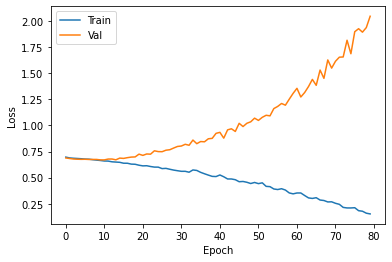

In [33]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの損失の描画
plt.plot(result.history['loss'])

# 折れ線グラフによる検証データの損失の描画
plt.plot(result.history['val_loss'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 描画の実行
plt.show()

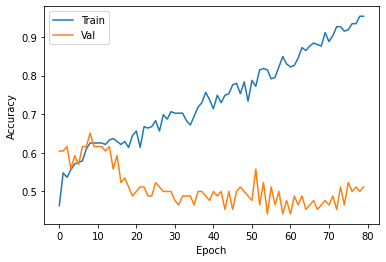

In [34]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの正解率の描画
plt.plot(result.history['accuracy'])

# 折れ線グラフによる検証データの正解率の描画
plt.plot(result.history['val_accuracy'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 描画の実行
plt.show()

## 学習済みモデルを使って、評価（test）データの予測をする！

In [35]:
# 評価データの予測結果の算出
pred_data = model.predict(X_test_t)

# 予測結果の先頭10件を確認
print('予測結果の先頭10件')
print(pred_data[:10])

予測結果の先頭10件
[[0.23523888]
 [0.19379857]
 [0.99343085]
 [0.27901566]
 [0.9986799 ]
 [0.878037  ]
 [0.04697174]
 [0.1978029 ]
 [0.9987897 ]
 [0.94508445]]


In [36]:
# 評価データの予測結果を0もしくは1に丸め込み（0.5を境にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
predict = np.where(pred_data < 0.5, 0, 1)

# 丸め込んだ予測結果の先頭10件を確認
print('丸め込んだ予測結果の先頭10件')
print(predict[:10])

丸め込んだ予測結果の先頭10件
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


## 提出用フォーマットのdf_sampleに予測結果を連結する

In [37]:
df_sample

,Date
0,2011-12-22
1,2012-01-05
2,2012-01-19
3,2012-02-02
4,2012-02-16
...,...
202,2019-10-23
203,2019-11-07
204,2019-11-21
205,2019-12-05


In [38]:
# データフレームに変換
predict_df = pd.DataFrame(predict)

In [39]:
# 予測結果とdf_sampleを連結
predict_data = pd.concat([df_sample , predict_df] , axis=1) 

In [40]:
predict_data

,Date,0
0,2011-12-22,0
1,2012-01-05,0
2,2012-01-19,1
3,2012-02-02,0
4,2012-02-16,1
...,...,...
202,2019-10-23,1
203,2019-11-07,0
204,2019-11-21,1
205,2019-12-05,0


In [41]:
# CSVデータとして出力
predict_data.to_csv("stock_price_result.csv", index=False, header=False)

In [43]:
#最終スコア確認
ans=pd.read_csv("answer_finance.csv")
y_pred=predict_data[0]
y_test=ans["Up"]
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.5458937198067633


In [44]:
#NULLモデルとの比較
a=df_test.copy()
a["Shift"]=a["Open"].shift(-1)
a["Diff"]=a["Shift"]-a["Close"]
a["Up"]=a["Diff"].apply(lambda x:1 if x>=0 else 0)
y_pred=a["Up"].values[4::6]
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.5169082125603864
